# Clase 3

In [31]:
import numpy as np
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.
    Parameters
    ------------
    eta : float
    Learning rate (between 0.0 and 1.0)
    n_iter : int
    Passes over the training dataset.
    random_state : int
    Random number generator seed for random weight
    initialization.
    Attributes
    -----------
    w_ : 1d-array
    Weights after fitting.
    cost_ : list
    Sum-of-squares cost function value in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    def fit(self, X, y):
        """ Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
        Training vectors, where n_samples is the number of samples and
        n_features is the number of features.
        y : array-like, shape = [n_samples]
        Target values.

        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def activation(self, X):
        """Compute linear activation"""
        return X
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

        

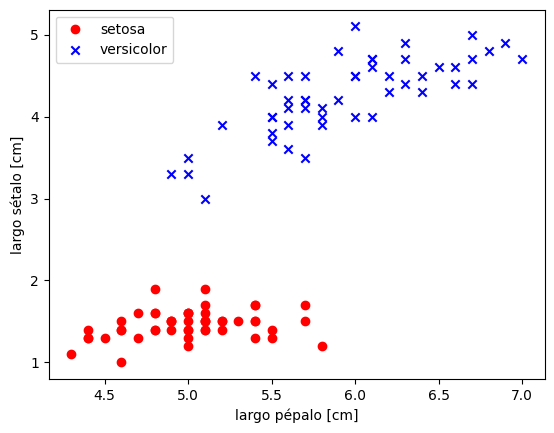

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://archive.ics.uci.edu/ml/''machine-learning-databases/iris/iris.data', header=None)
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values
plt.scatter(X[:50, 0], X[:50, 1],
color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
color='blue', marker='x', label='versicolor')
plt.xlabel('largo pépalo [cm]')
plt.ylabel('largo sétalo [cm]')
plt.legend(loc='upper left')
#plt.savefig('02_06.png', dpi=300)
plt.show()

In [3]:
df.describe(include= 'all')

,0,1,2,3,4
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


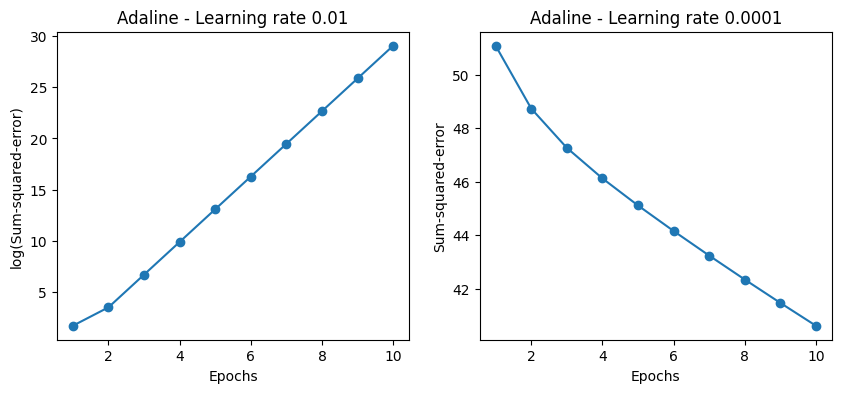

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
#ax[0].plot(range(1, len(ada1.cost_) + 1), ada1.cost_, marker='o')
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
#plt.savefig('02_11.png', dpi=300)
plt.show()

### estandarizar

In [8]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

In [21]:
X_std

array([[-0.5810659 , -1.01435952],
       [-0.89430898, -1.01435952],
       [-1.20755205, -1.08374115],
       [-1.36417359, -0.94497788],
       [-0.73768744, -1.01435952],
       [-0.11120129, -0.80621461],
       [-1.36417359, -1.01435952],
       [-0.73768744, -0.94497788],
       [-1.67741667, -1.01435952],
       [-0.89430898, -0.94497788],
       [-0.11120129, -0.94497788],
       [-1.05093052, -0.87559625],
       [-1.05093052, -1.01435952],
       [-1.8340382 , -1.22250442],
       [ 0.51528486, -1.15312279],
       [ 0.35866332, -0.94497788],
       [-0.11120129, -1.08374115],
       [-0.5810659 , -1.01435952],
       [ 0.35866332, -0.80621461],
       [-0.5810659 , -0.94497788],
       [-0.11120129, -0.80621461],
       [-0.5810659 , -0.94497788],
       [-1.36417359, -1.29188606],
       [-0.5810659 , -0.80621461],
       [-1.05093052, -0.66745134],
       [-0.73768744, -0.87559625],
       [-0.73768744, -0.87559625],
       [-0.42444437, -0.94497788],
       [-0.42444437,

In [58]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        if cl == -1:
            label = 'setosa'
        else:
            label = 'versicolor'
        plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha=0.8,c=colors[idx],
                    marker=markers[idx], label=label,edgecolor='black')



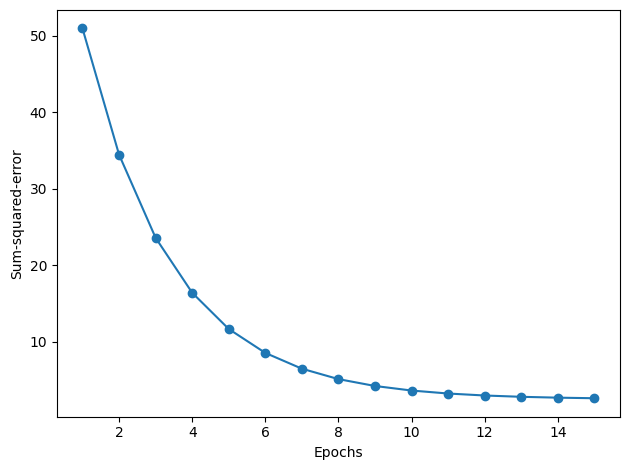

In [10]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.tight_layout()
#plt.savefig('images/02_14_2.png', dpi=300)
plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_2976\270858907.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha=0.8,c=colors[idx],


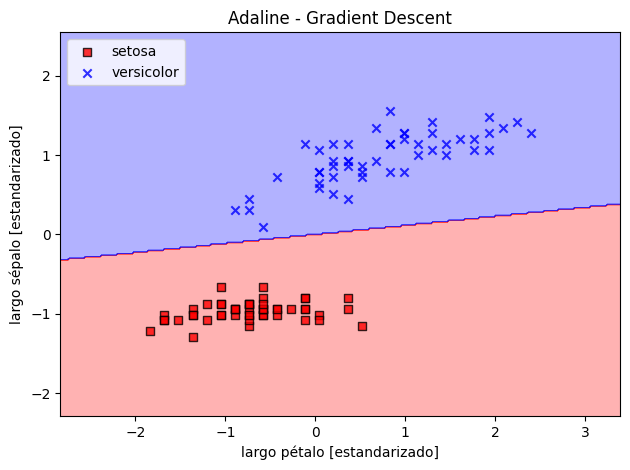

In [11]:
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('largo pétalo [estandarizado]')
plt.ylabel('largo sépalo [estandarizado]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/02_14_1.png', dpi=300)
plt.show()

In [30]:
class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.
    Parameters
    ------------
    eta : float
    Learning rate (between 0.0 and 1.0)
    n_iter : int
    Passes over the training dataset.
    shuffle : bool (default: True)
    Shuffles training data every epoch if True to prevent cycles.
    random_state : int
    Random number generator seed for random weight
    initialization.

    Attributes
    -----------
    w_ : 1d-array
    Weights after fitting.
    cost_ : list
    Sum-of-squares cost function value averaged over all
    training samples in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
        Training vectors, where n_samples is the number of samples and
        n_features is the number of features.

        y : array-like, shape = [n_samples]
        Target values.
        Returns
        -------
        self : object
        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def activation(self, X):
        """Compute linear activation"""
        return X
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)
        

C:\Users\acer\AppData\Local\Temp\ipykernel_2976\270858907.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha=0.8,c=colors[idx],


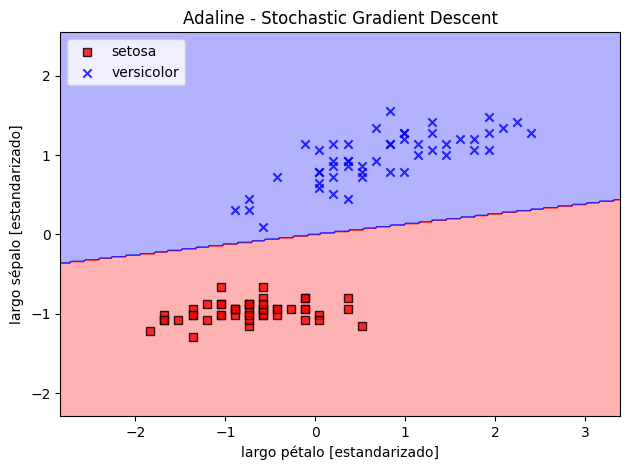

In [19]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('largo pétalo [estandarizado]')
plt.ylabel('largo sépalo [estandarizado]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('
plt.show()

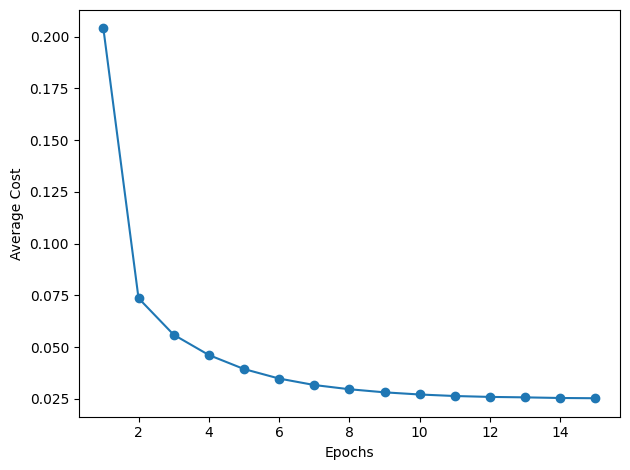

In [20]:
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.tight_layout()
#plt.savefig('images/02_15_2.png', dpi=300)
plt.show()

In [25]:
x_test = np.array([[-0.5845664 , 1.234345],
       [-0.823445656, -1.3454567],
       [-1.36566, -0.67567]])

y = ada.predict(x_test)
y

array([ 1, -1, -1])

In [26]:
ada.net_input(x_test)

array([ 1.40521395, -1.32886884, -0.53531313])

In [27]:
ada.activation(x_test)

array([[-0.5845664 ,  1.234345  ],
       [-0.82344566, -1.3454567 ],
       [-1.36566   , -0.67567   ]])

# Clase 4

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


In [6]:
path = os.path.join(os.getcwd(),"iris.data")
df = pd.read_csv(path,header=None)
df.head(10)

,0,1,2,3,4
0,5.4,3.9,1.7,0.4,Iris-setosa
1,6.3,2.7,4.9,1.8,Iris-virginica
2,6.9,3.2,5.7,2.3,Iris-virginica
3,6.9,3.1,5.4,2.1,Iris-virginica
4,4.8,3.1,1.6,0.2,Iris-setosa
5,6.5,3.2,5.1,2.0,Iris-virginica
6,4.6,3.6,1.0,0.2,Iris-setosa
7,6.9,3.1,5.1,2.3,Iris-virginica
8,4.6,3.2,1.4,0.2,Iris-setosa
9,5.4,3.0,4.5,1.5,Iris-versicolor


In [12]:
df.columns = ['var0','var1','var2','var3','tag']
df = df.sort_values(by='tag')
df

,var0,var1,var2,var3,tag
0,5.4,3.9,1.7,0.4,Iris-setosa
71,5.5,4.2,1.4,0.2,Iris-setosa
35,5.4,3.9,1.3,0.4,Iris-setosa
31,5.1,3.8,1.5,0.3,Iris-setosa
116,5.1,3.4,1.5,0.2,Iris-setosa
...,...,...,...,...,...
2,6.9,3.2,5.7,2.3,Iris-virginica
146,7.3,2.9,6.3,1.8,Iris-virginica
1,6.3,2.7,4.9,1.8,Iris-virginica
73,6.0,2.2,5.0,1.5,Iris-virginica


In [15]:
df.describe(include= 'all')

,var0,var1,var2,var3,tag
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


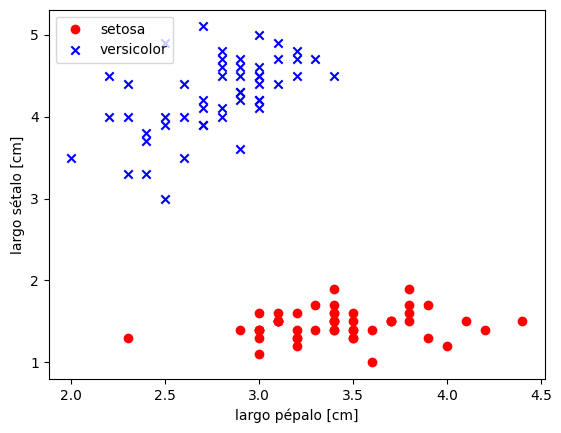

In [20]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [1, 2]].values
plt.scatter(X[:50, 0], X[:50, 1],color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],color='blue', marker='x', label='versicolor')
plt.xlabel('largo pépalo [cm]')
plt.ylabel('largo sétalo [cm]')
plt.legend(loc='upper left')
plt.show()

In [21]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

In [54]:
from sklearn.utils import shuffle


X_gd , Y_gd = X_std[:50],y[:50]
X_gd, Y_gd = shuffle(X_gd, Y_gd)

In [55]:
X_sgd , Y_sgd = X_std[50:100],y[50:100]
X_sgd, Y_sgd = shuffle(X_sgd, Y_sgd)

In [60]:
adaSGD = AdalineSGD(n_iter=15, eta=0.001, random_state=1)
print(" adalineSGD")
print(adaSGD.fit(X_sgd, Y_sgd).w_)
print(adaSGD.partial_fit(X_sgd, Y_sgd).w_)

 adalineSGD
[ 0.36243173 -0.21425301  0.32727358]
[ 0.37065099 -0.21719392  0.3347918 ]


In [44]:
adaGD = AdalineGD(n_iter=15, eta=0.01, random_state=1)
print(" adalineGD")
print(adaGD.fit(X_gd, Y_gd).w_)
print(adaGD.fit(X_gd, Y_gd).w_)

 adalineGD
[-0.5181204  -0.02103337  0.47752273]
[-0.5181204  -0.02103337  0.47752273]


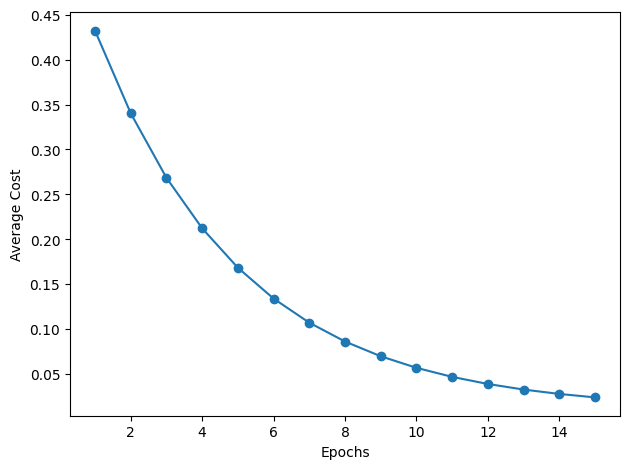

In [61]:
plt.plot(range(1, len(adaSGD.cost_) + 1), adaSGD.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.tight_layout()
#plt.savefig('images/02_15_2.png', dpi=300)
plt.show()

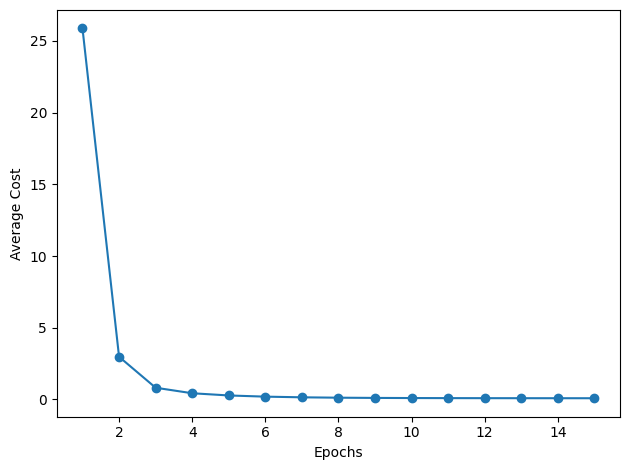

In [53]:
plt.plot(range(1, len(adaGD.cost_) + 1), adaGD.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.tight_layout()
#plt.savefig('images/02_15_2.png', dpi=300)
plt.show()

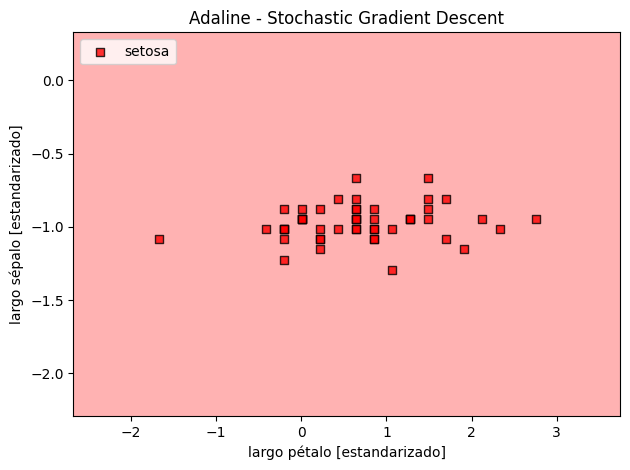

In [59]:
adaGD = AdalineGD(n_iter=15, eta=0.01, random_state=1)
adaGD.fit(X_gd, Y_gd)
plot_decision_regions(X_gd, Y_gd, classifier=adaGD)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('largo pétalo [estandarizado]')
plt.ylabel('largo sépalo [estandarizado]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('
plt.show()